# SOMs testing with model M5b

This notebook test SOMs with the following set of parameters:

dim = 30
<br />iter_cnt = 4000
<br />learning rate = 0.512439
<br />sigma = 2.189655


In [149]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append("..")
from acse_9_irp_wafflescore import MiscHelpers as mh
from acse_9_irp_wafflescore import SOMsHelpers as sh
from acse_9_irp_wafflescore import dataPreprocessing as dp

import numpy as np
from timeit import default_timer as timer

import logging
import sys

logging.basicConfig(format='%(asctime)s | %(levelname)s : %(message)s',
                     level=logging.INFO, stream=sys.stdout)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Tested with model with smaller anomaly (M5b)

In [ ]:
model = 'M1'

pdir = '../data/' + model + '_xz_pos.npy'
xz_pos = np.load(pdir)
x = xz_pos[:, 0]
z = xz_pos[:, 1]

ldir = '../data/' + model + '_data_label.npy'
label = np.load(ldir)

cdir = '../data/' + model + '_clean_data.npy'
data = np.load(cdir)

ddir = '../data/' + model + '_init_data.npy'
idata = np.load(cdir)


In [3]:
means, stds = dp.compMeanStd(data)
norm_data = dp.normalize(data, means, stds)

In [44]:
#  Populate SOMs with whole dataset
# initialize hyperparameters
dim, iter_cnt, lr, sigma = (30, 4000, 0.512439, 2.189655)
seed = 10

som = sh.som_assemble(norm_data, seed, dim, lr, sigma)

start = timer()
som.train_random(norm_data, iter_cnt, verbose=False)
end = timer()
elapsed_time = end - start
logging.info("Time taken: %.6f", elapsed_time)

2019-08-28 20:44:17,551 | INFO : Time taken: 6.700087


Since we have the actual label, we can map to show how SOMs neural map turns out.

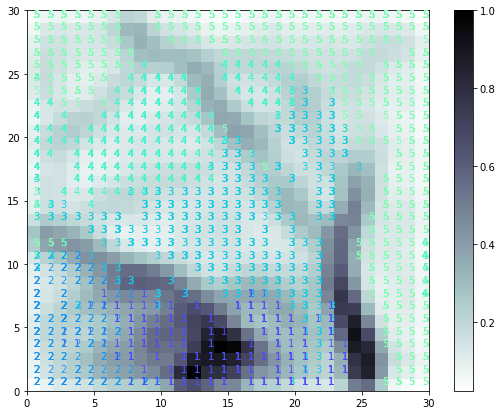

In [5]:
sh.plot_som(som, norm_data, label, save=False)

/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


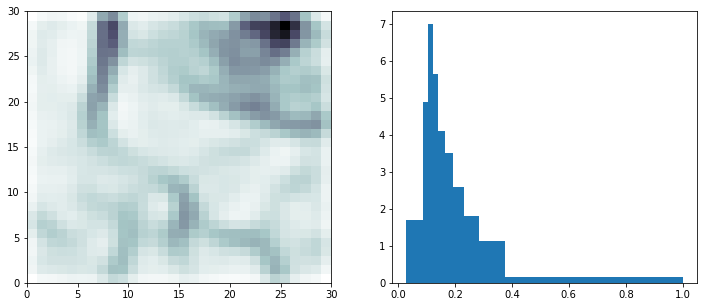

In [45]:
u_matrix = som.distance_map().T
watershed_bins = sh.plot_u_matrix(u_matrix)

2019-08-28 20:44:30,169 | INFO : Not enough labeled neighbor to perform KNN.
                      Will return the original inputted value.


/anaconda3/lib/python3.6/site-packages/skimage/segmentation/random_walker_segmentation.py:407: UserWarning: Random walker only segments unlabeled areas, where labels == 0. No zero valued areas in labels were found. Returning provided labels.
  warn('Random walker only segments unlabeled areas, where '


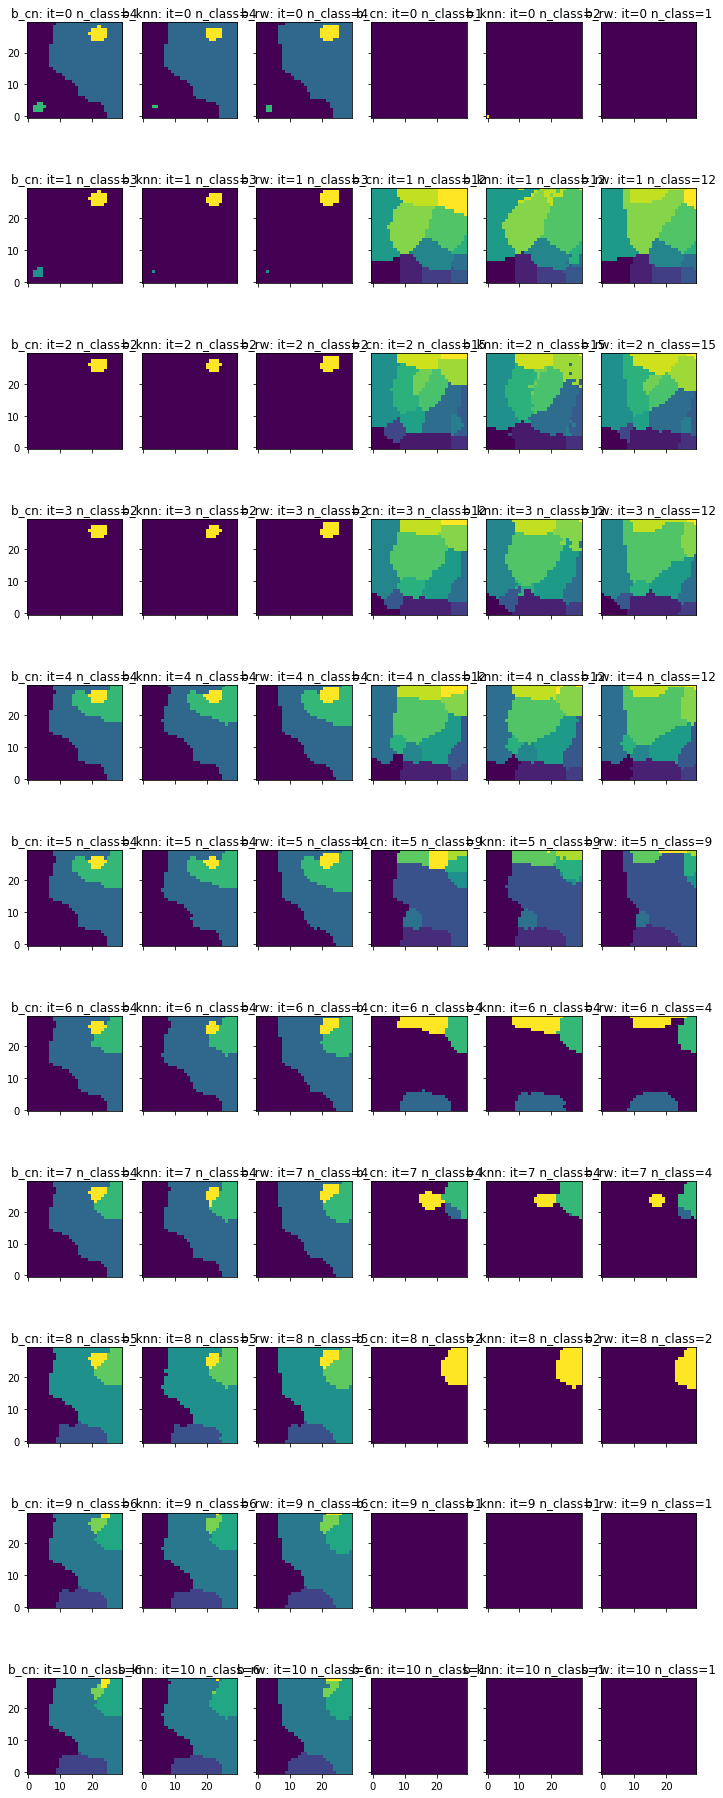

In [46]:
ws_labels = sh.watershed_level(u_matrix, watershed_bins, plot=True)

In [47]:
n_map = som.neuron_map(norm_data)

In [102]:
cluster_labels, sils, csc, best_idx = sh.eval_ws(norm_data, ws_labels, n_map, re_all=True)

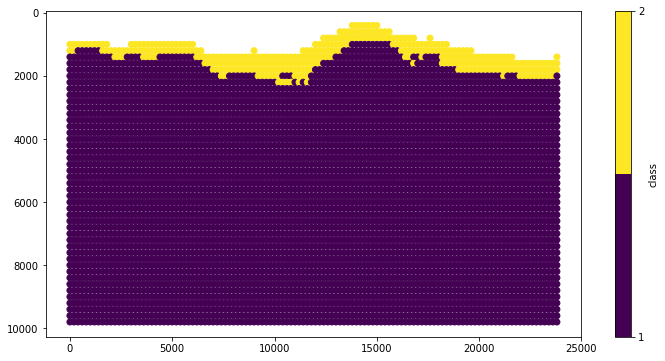

In [50]:
for c in cluster_labels[best_idx]:
    mh.plot_e_model(c, x, z, sep_label=True)

It can be observed that the result from using the best silhouette score and Calinski Harabaz score does not always represent the best result. Below is the plot generated from all the watershed segmentation. With a condition that there must be at least 4 clusters in the result. The result are presented in the order of descending Calinski Harabaz score.

27 , 0.06737399867973155 , 797.5421114601577 , 0.6162548364252398 , 0.7265903546631638 , 12


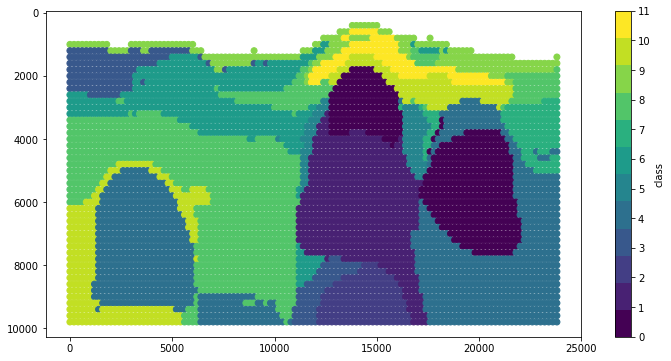

9 , 0.047927791558644496 , 785.5776111779028 , 0.5801291434967873 , 0.7235879151810847 , 12


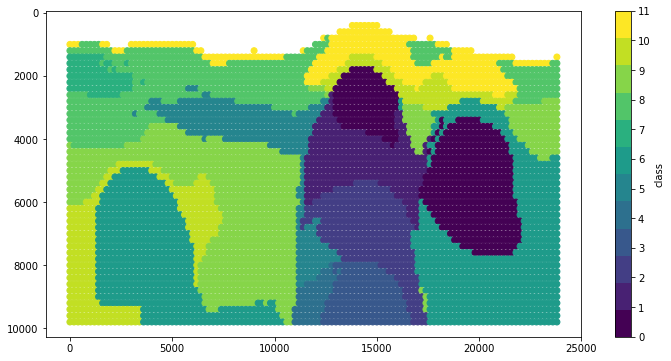

21 , 0.034938587824062804 , 719.6435323568389 , 0.633057130841784 , 0.7160818164758868 , 12


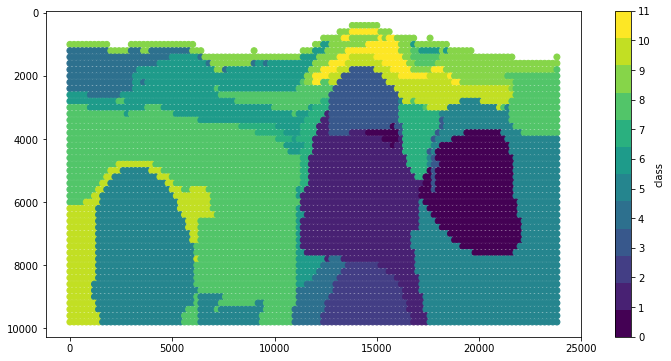

15 , 0.029403459199027926 , 637.5021870405319 , 0.5703987241905049 , 0.7661850253330832 , 15


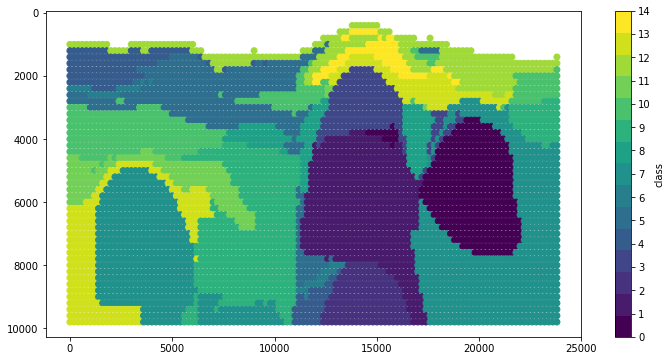

48 , 0.027525754464787423 , 1181.0042680742777 , 0.9342494070815642 , 0.6226308875961718 , 5


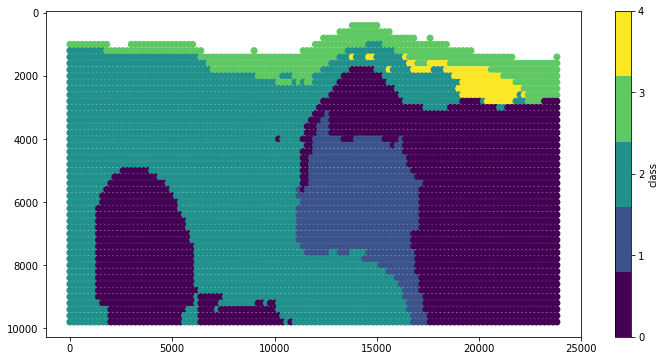

50 , 0.02503377939489328 , 1230.6059959488282 , 0.9556742992310501 , 0.6124976543441547 , 5


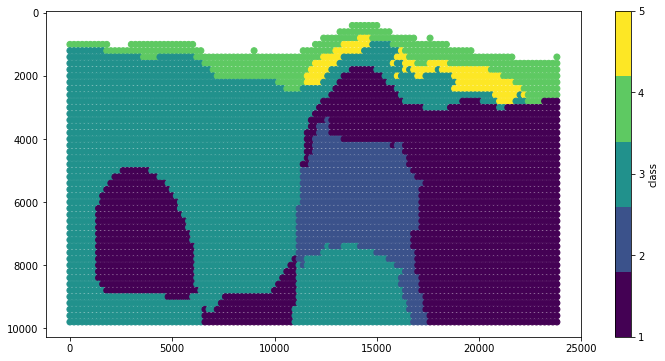

54 , 0.022773391099859288 , 972.5393476798888 , 0.9216422849534032 , 0.6246950647401013 , 6


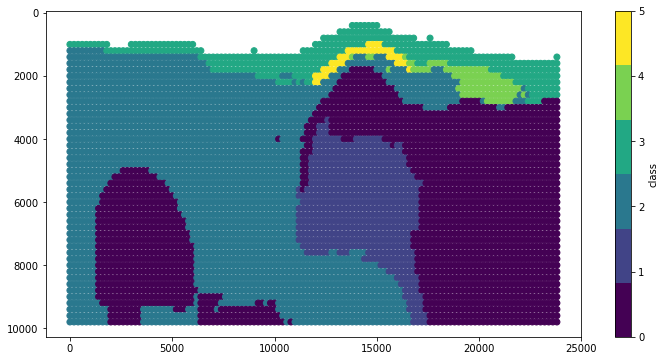

28 , 0.02118924924562864 , 676.1663411171947 , 0.6370693095503644 , 0.7102645899793584 , 12


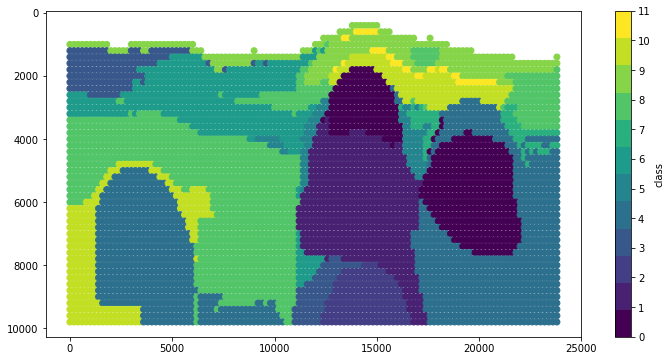

49 , 0.019522168728225098 , 1154.2812507824146 , 0.9542296139023946 , 0.6096828673297054 , 5


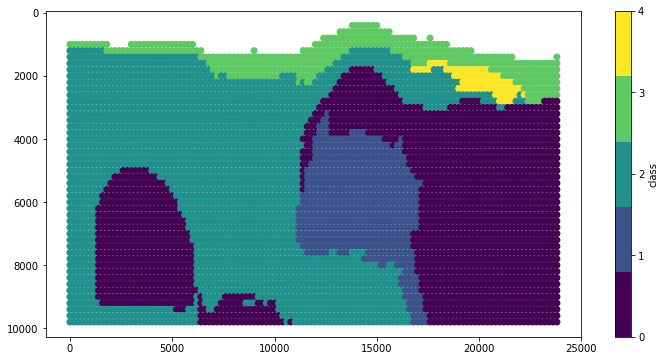

60 , 0.017384125493345406 , 949.3595105543144 , 0.9284091089689213 , 0.6235691499343217 , 6


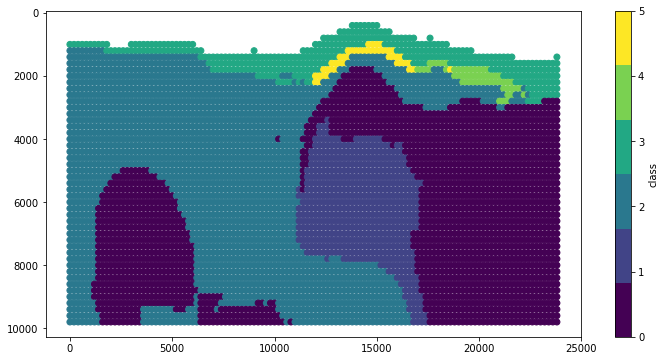

56 , 0.016464088983347582 , 1038.7285469276972 , 0.9286316377398326 , 0.6216926252580222 , 6


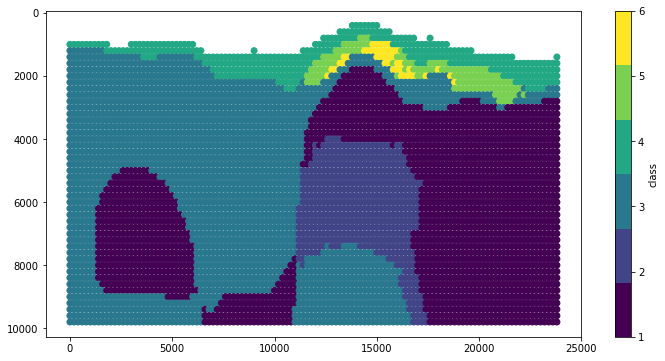

55 , 0.014062807233292913 , 932.7622583247879 , 0.936757508672525 , 0.6153124413586039 , 6


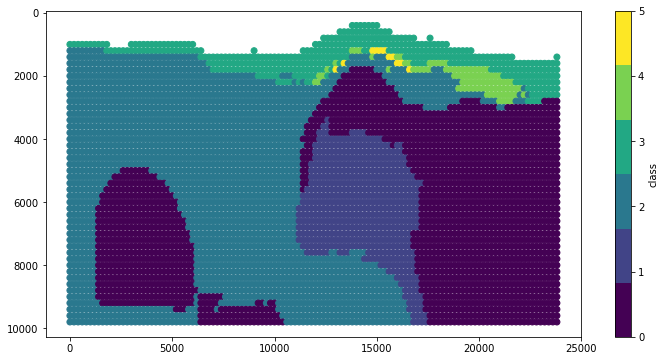

62 , 0.0042847394600191374 , 987.4094908585304 , 0.9522107750940177 , 0.6121223494088948 , 6


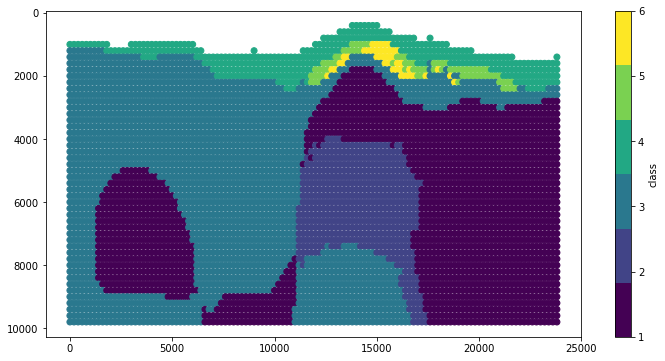

10 , 0.0007536227397721266 , 669.602629916692 , 0.657096039660463 , 0.6993807468568212 , 12


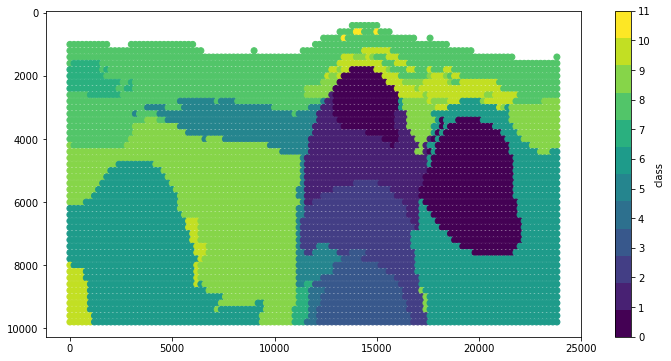

17 , 0.0004251673877457401 , 673.7448483087948 , 0.6108875826699386 , 0.7498592606492774 , 15


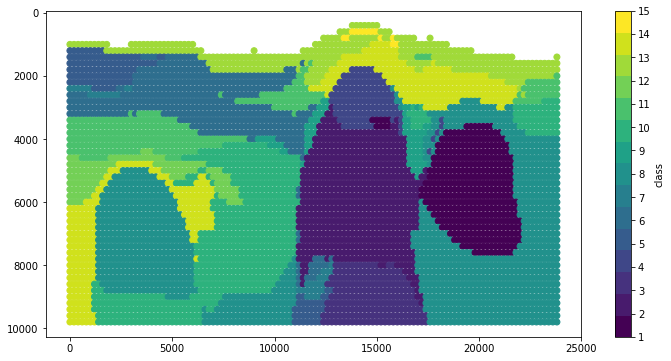

22 , -0.007360224386167071 , 601.7415772745231 , 0.6547890414939799 , 0.7110151998498782 , 12


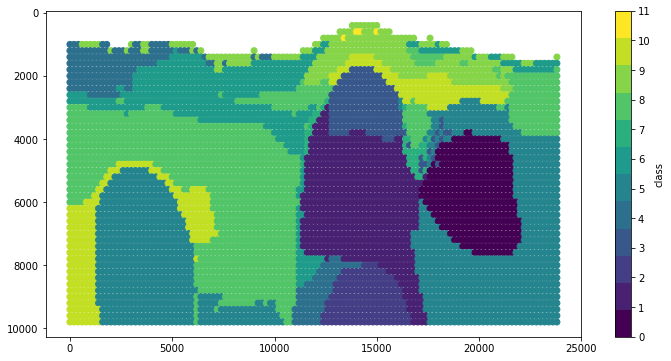

29 , -0.009833038156858986 , 695.9640075622109 , 0.7458962228233358 , 0.6903734284105836 , 12


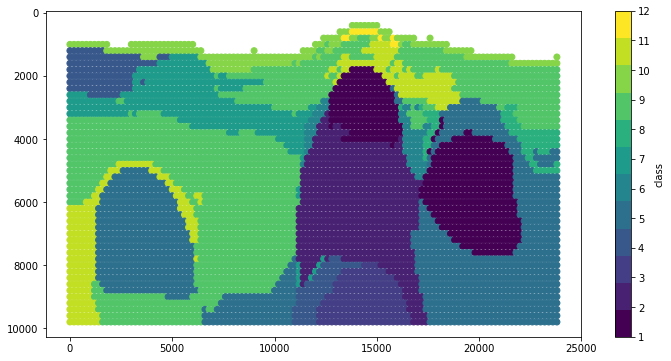

11 , -0.010803543829467282 , 716.0847531200725 , 0.7446218203877278 , 0.6699193094389191 , 12


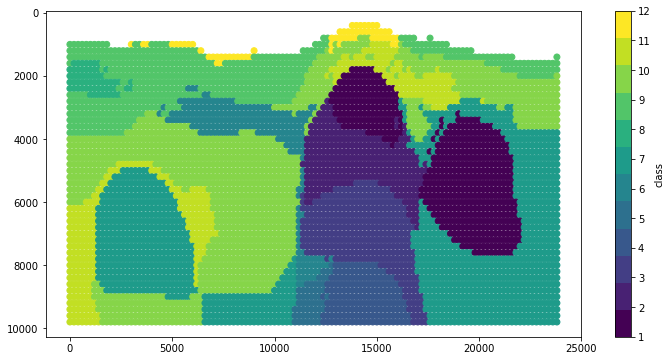

61 , -0.014132403229942263 , 875.0803888860478 , 0.9628614102079568 , 0.6049915556389567 , 6


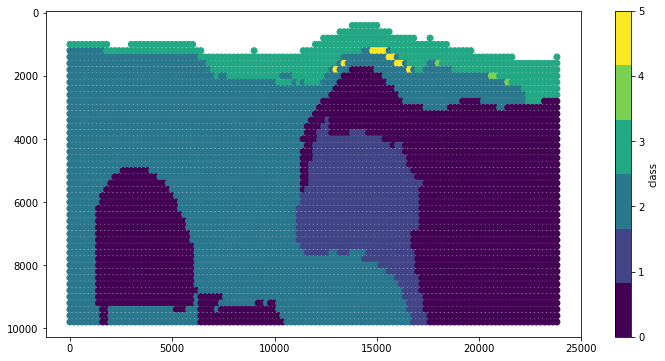

23 , -0.02301607465083232 , 679.8934875625418 , 0.7909763848996068 , 0.6757365359354476 , 12


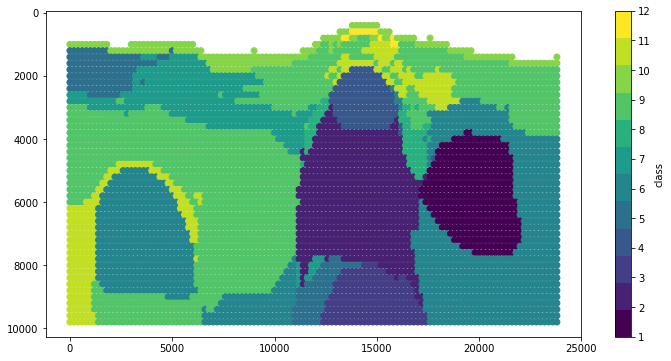

33 , -0.06136425211405801 , 786.89250684912 , 0.8375055834585754 , 0.6616626008632013 , 9


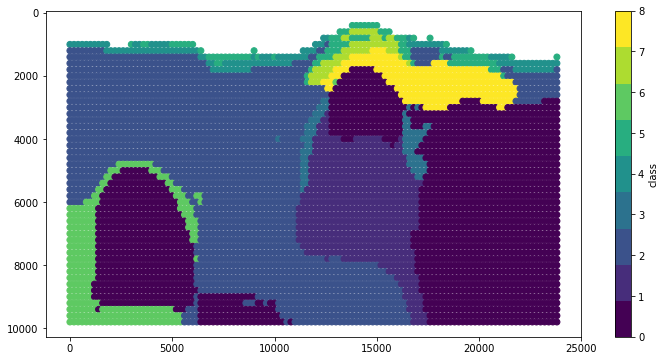

34 , -0.09769255668131975 , 589.1296314356088 , 0.8904630892567779 , 0.633327078251079 , 9


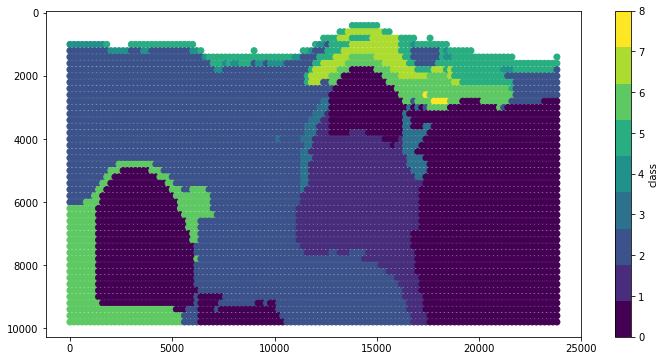

16 , -0.10857969881042219 , 511.3355120074056 , 0.5786820431810276 , 0.7742540814411709 , 15


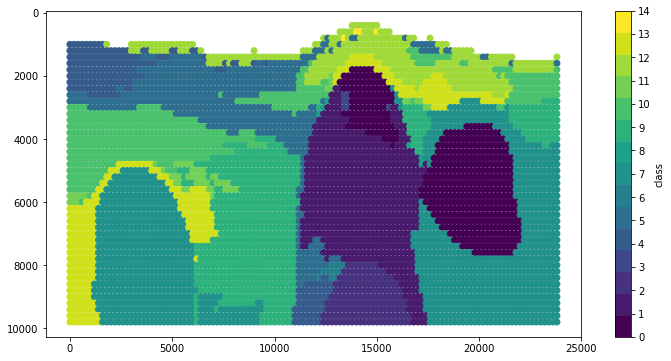

35 , -0.1493139087387206 , 591.2377652175454 , 0.9914516814947484 , 0.6057421655094765 , 9


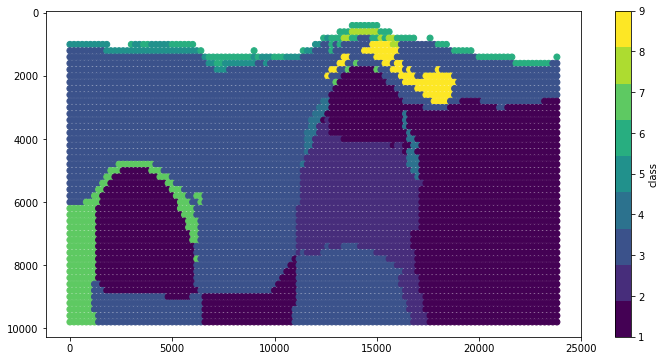

In [91]:
csc_idx = np.argsort(csc)[::-1]
sil_idx = np.argsort(sils)[::-1]
for i in sil_idx:
    ent, pur = mh.ext_eval_entropy(label, cluster_labels[i])
    n_class = len(np.unique(cluster_labels[i]))
    if(n_class < 20 and n_class > 4):
        print(i, ',', sils[i], ',', csc[i], ',', ent, ',', pur, ',', n_class)
        mh.plot_e_model(cluster_labels[i], x, z, sep_label=True)

index: 50 ,sil: 0.02503377939489328 ,ch: 1230.6059959488282


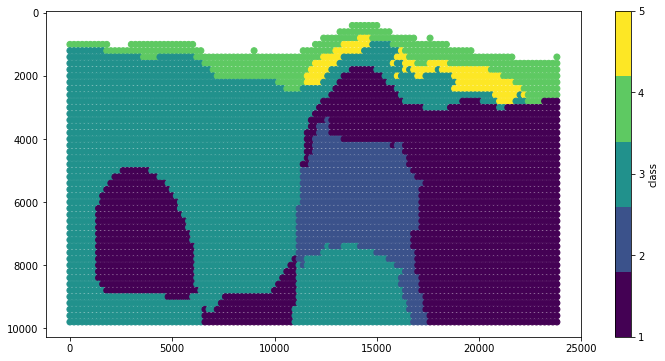

In [103]:
# plot of best Calinski Harabaz score
# 50 , 0.02503377939489328 , 1230.6059959488282 , 0.9556742992310501 , 0.6124976543441547 , 5
i = 50 
print('index:', i, ',sil:', sils[i], ',ch:', csc[i])
mh.plot_e_model(cluster_labels[i], x, z, sep_label=True)

index: 27 ,sil: 0.06737399867973155 ,ch: 797.5421114601577


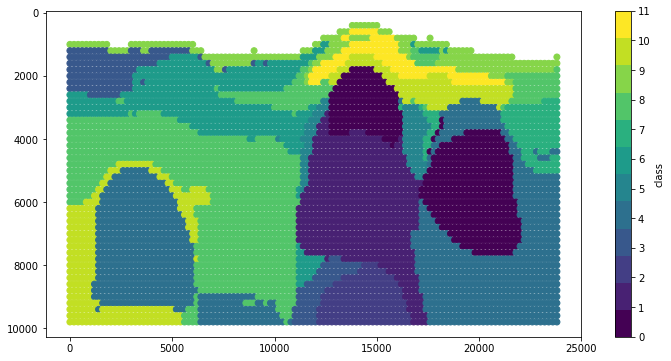

In [104]:
# plot of best silhouette score
# 27 , 0.06737399867973155 , 797.5421114601577 , 0.6162548364252398 , 0.7265903546631638 , 12
i = 27
print('index:', i, ',sil:', sils[i], ',ch:', csc[i])
mh.plot_e_model(cluster_labels[i], x, z, sep_label=True)

# SOMs with application of other clustering methods
Since SOMs is a neural network that generates a u-matrix, this matrix could then be used as an input for other classification method.

## SOMs with HDBScan
The min_cluster_size of 41 and min_samples of 7 was found from HDBScan - Parameter Tuning

In [96]:
from acse_9_irp_wafflescore import HDBScanHelpers as hp
import hdbscan

In [97]:
start = timer()
clusterer = hdbscan.HDBSCAN(min_cluster_size=41,
                            min_samples=7)
cluster_labels = clusterer.fit_predict(n_map)
stop = timer()
logging.info("HDBScan elapsed time: %.6f", stop - start)

2019-08-28 21:39:45,856 | INFO : HDBScan elapsed time: 0.115207


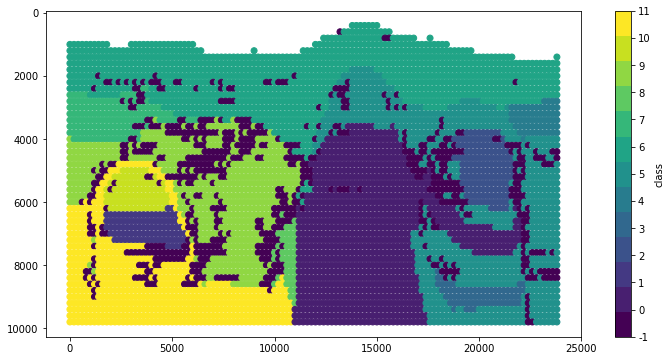

In [98]:
mh.plot_e_model(cluster_labels, x, z, sep_label=True)

It can be seen that the same parameter from HDBScan cannot be used to optimize the SOMs-HDBScan.
Since this is the case, another parameter tuning must be done.

In [108]:
cluster_labels, avg_sils, avg_ch, min_size, min_sam = hp.random_search_hdb(n_map, (5,5), max_eval=20, rand_range=(50,50))

2019-08-28 22:39:34,156 | INFO : min_size=41, min_sam=7, sil=-0.039545, ch=1058.915489
2019-08-28 22:39:34,983 | INFO : min_size=32, min_sam=35, sil=-0.100260, ch=473.168845
2019-08-28 22:39:35,803 | INFO : min_size=41, min_sam=5, sil=-0.160741, ch=544.283240
2019-08-28 22:39:35,853 | INFO : Random search using min_size = 18, min_sam = 34 result to very small / large number of clusters (n_clusters = 33)
2019-08-28 22:39:36,533 | INFO : min_size=36, min_sam=22, sil=-0.126954, ch=362.736982
2019-08-28 22:39:37,300 | INFO : min_size=46, min_sam=15, sil=-0.009303, ch=781.818596
2019-08-28 22:39:37,375 | INFO : Random search using min_size = 7, min_sam = 38 result to very small / large number of clusters (n_clusters = 72)
2019-08-28 22:39:38,066 | INFO : min_size=36, min_sam=25, sil=-0.029046, ch=588.212799
2019-08-28 22:39:38,131 | INFO : Random search using min_size = 9, min_sam = 20 result to very small / large number of clusters (n_clusters = 105)
2019-08-28 22:39:38,955 | INFO : min_si

min_size, min_sample: 41.0 7.0
silhouette score: -0.039545035284308486
calinski harabaz score: 1058.9154893213106


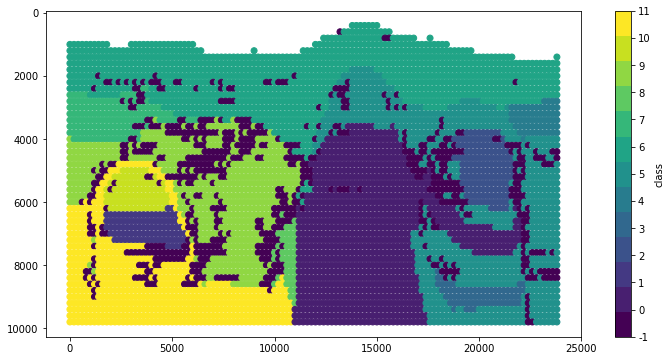

min_size, min_sample: 54.0 20.0
silhouette score: 0.04180479249778338
calinski harabaz score: 917.7693228800443


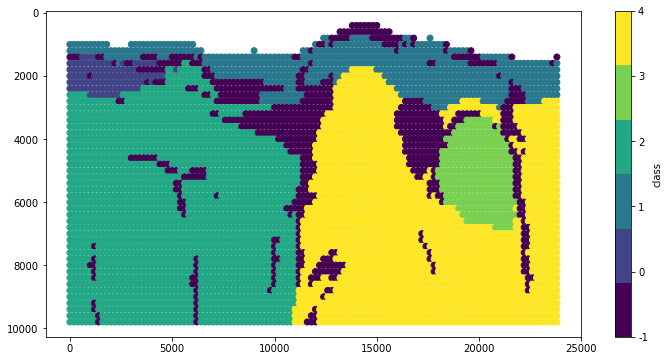

In [109]:
for i in range(cluster_labels.shape[0]):
    print("min_size, min_sample:", min_size[i], min_sam[i])
    print("silhouette score:", avg_sils[i])
    print("calinski harabaz score:", avg_ch[i])
    mh.plot_e_model(cluster_labels[i], x, z, sep_label=True)

Somehow the result from applying HDBSCAN on the U-matrix generated are not decent at all.




# SOMs with Fuzzy C Mean

In [120]:
from acse_9_irp_wafflescore import FCMHelpers as fh

2019-08-29 00:08:24,512 | INFO : FCM elapsed time: 21.324880
2019-08-29 00:08:25,300 | INFO : sil=0.365374, chs=4934.433070
2019-08-29 00:09:25,326 | INFO : FCM elapsed time: 60.025090
2019-08-29 00:09:25,928 | INFO : sil=0.354469, chs=4929.957389
2019-08-29 00:11:12,492 | INFO : FCM elapsed time: 106.562182
2019-08-29 00:11:13,111 | INFO : sil=0.316192, chs=4590.384915
2019-08-29 00:14:47,422 | INFO : FCM elapsed time: 214.307395
2019-08-29 00:14:48,071 | INFO : sil=0.342359, chs=5235.555146


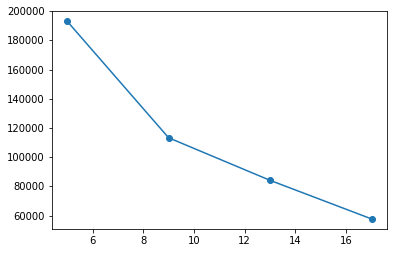

In [121]:
n_classes = range(5, 20, 4)
fcms, pred_mems, SSE, avg_sils, ch_scs, best_idx = fh.iter_n_class(n_map, n_classes)

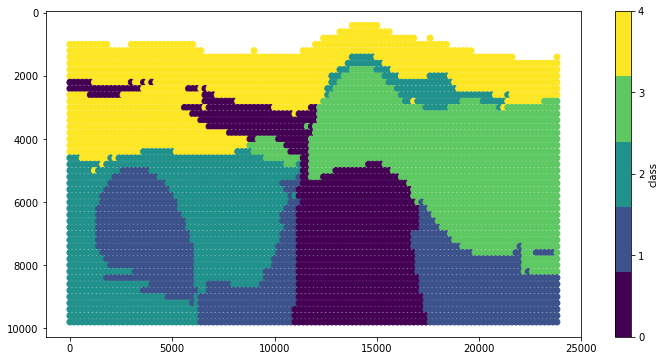

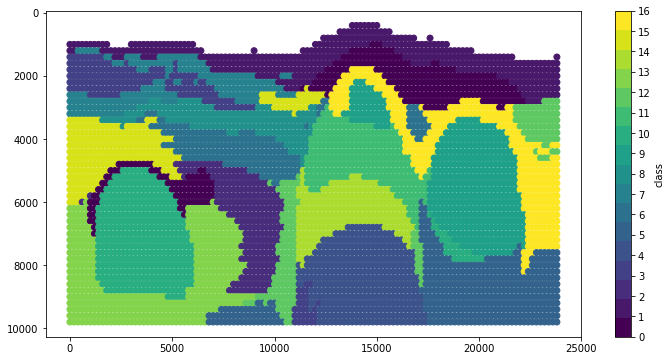

In [135]:
for i, p in enumerate(pred_mems):
    if(i in best_idx):
        fh.plot_best_fuzz(p, x, z)

# SOMs with K-mean clustering

2019-08-29 01:03:00,640 | INFO : sil=0.417504, chs=5404.247269
2019-08-29 01:03:01,339 | INFO : sil=0.405327, chs=5374.661773
2019-08-29 01:03:02,206 | INFO : sil=0.392123, chs=5477.555513
2019-08-29 01:03:02,916 | INFO : sil=0.400142, chs=5654.603252
2019-08-29 01:03:03,653 | INFO : sil=0.398621, chs=6004.775896
2019-08-29 01:03:04,321 | INFO : sil=0.398896, chs=6002.713505
2019-08-29 01:03:05,017 | INFO : sil=0.394548, chs=6020.503949
2019-08-29 01:03:05,754 | INFO : sil=0.399912, chs=6057.150114
2019-08-29 01:03:06,432 | INFO : sil=0.395363, chs=6171.163252
2019-08-29 01:03:07,109 | INFO : sil=0.393204, chs=6221.520105
2019-08-29 01:03:07,794 | INFO : sil=0.384804, chs=6119.406308
2019-08-29 01:03:08,507 | INFO : sil=0.397286, chs=6193.407745
2019-08-29 01:03:09,191 | INFO : sil=0.391002, chs=6197.264720
2019-08-29 01:03:09,880 | INFO : sil=0.393895, chs=6341.730116
2019-08-29 01:03:10,626 | INFO : sil=0.387334, chs=6364.953754


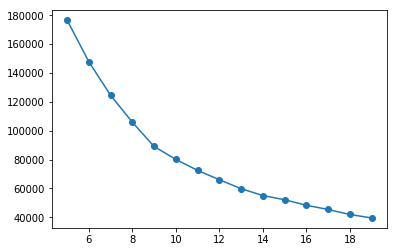

In [151]:
in_range = range(5, 20)

cluster_labels, avg_sils, ch_scs, SSE, best_idx = mh.iter_kmean(n_map, in_range)

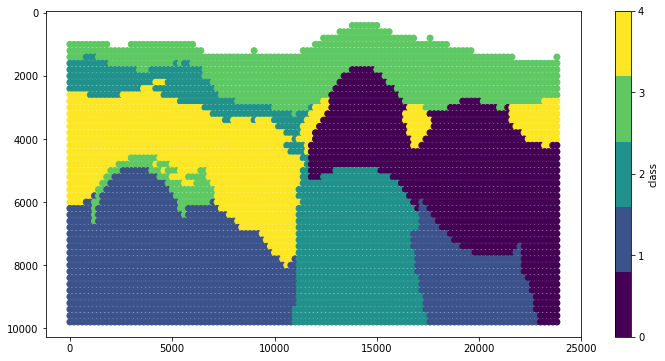

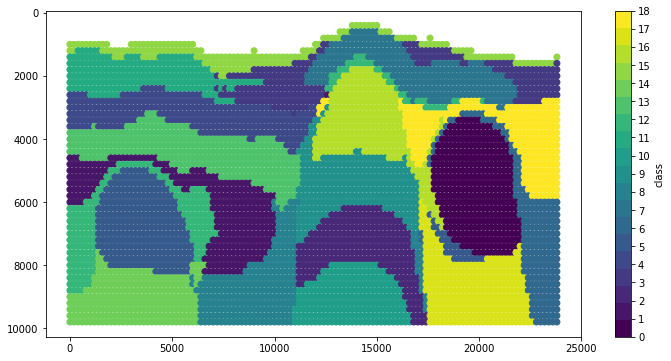

In [153]:
for c in cluster_labels[best_idx]:
    mh.plot_e_model(c, x, z, sep_label=True)

This demonstrates that SOMs can be applied to any other clustering method, though the initial neuron map plays a big role in how the result will show up.